In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from gaussian_naive_bayes import *
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Importando os dados e Codificando

In [15]:
data = pd.read_csv('../vehicle.csv', header=None)

X = data.iloc[:, :-1].values
y = (data.iloc[:, -1].values).reshape(-1, 1)

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

## Naive Bayes Gaussiano

### Treinando o modelo

In [16]:
kf = KFold(n_splits=10, shuffle=True)
accuracies = list()
logs = list()

model = GaussianNaiveBayes()

for train_index, test_index in kf.split(X):
     X_train, X_test, y_train, y_test = (
          X[train_index],
          X[test_index],
          y[train_index],
          y[test_index]
     )
     
     
     model.fit(X_train, y_train)
     y_pred = model.pred(X_test).reshape(-1, 1)
     y_pred = ohe.transform(y_pred).toarray()
     acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
     cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
     accuracies.append([acc, cm[0][0], cm[1][1], cm[2][2], cm[3][3]])

### Plotando as medidas descritivas

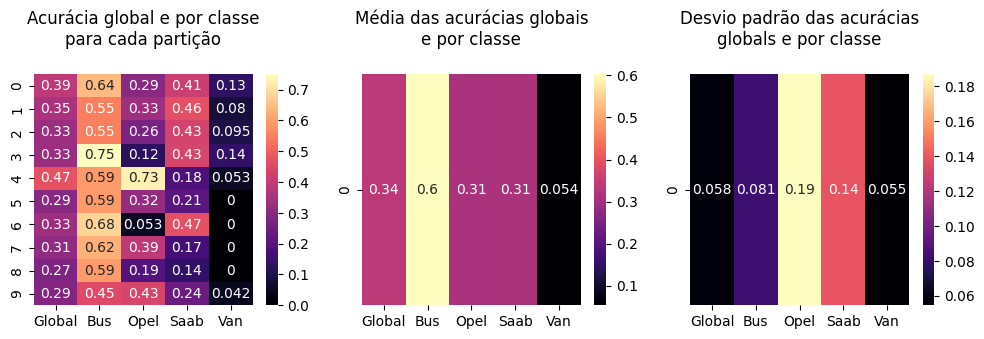

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

xlabels = ['Global', 'Bus', 'Opel', 'Saab', 'Van']
ylabels = range(len(accuracies))
per_fold = sns.heatmap(accuracies, annot=True, xticklabels=xlabels, yticklabels=ylabels, cmap='magma', ax=ax1)
means = sns.heatmap([np.mean(accuracies, axis=0)], xticklabels=xlabels, annot=True, cmap='magma', ax=ax2)
stds = sns.heatmap([np.std(accuracies, axis=0, ddof=1)], xticklabels=xlabels, annot=True, cmap='magma', ax=ax3)

ax1.set_title('Acurácia global e por classe\npara cada partição\n')
ax2.set_title('Média das acurácias globais\ne por classe\n')
ax3.set_title('Desvio padrão das acurácias\nglobals e por classe\n')
plt.show()